# Load the data

<span style="font-size: 16px;">The blasted file has no headers, who does that :|</span>

In [23]:
import pandas
import numpy
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as pyplot


### List columns names based on the description
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 
 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 
'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 
'dislocation of', 'exclusion of no', 'no. of nodes in']

lymphdata = pandas.read_csv('lymphography.data', names=col_names)

print("Size of dataset:", lymphdata.shape)
lymphdata.head()


Size of dataset: (148, 19)


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


# Explore the data

Lets check out the dataset and decide which features we need to use

In [24]:
lymphdata.describe()

# Check for any missing values
print(lymphdata.isnull().sum())

# Goody gumdrops. Get us a cup of tea, would you Errol?

# Get the correlation matrix
print(lymphdata.corr())

# Get the top 10 correlations
feature_cols = (lymphdata.corr().abs().nlargest(10, 'class').index)

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym.    0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64
                    class  lymphatics  block of affere  bl. of lymph. c  \
class            1.000000    0.147550        -0.358447        -0.054812   
lymphatics       0.147550    1.000000         0.084322         0.058310   
block of affere -0.358447    0.084322         1.000000         0.414163   
bl. of lymph. c -0.054812    0.058310         0.414163         1.000000   
bl. of lymph. s  0.212651    0.109285         0.199896         0.482650   
by pass          0.046761    0.217326         0.350223         0.565957   
extravasates     0.118952    0.136961         0.338391         

# Create a 'clean' dataset

In [25]:
# Replacing all lymphdata numeric values with descriptive labels as outlined in the lymphography.names file
# Attribute information:
#     NOTE: All attribute values in the database have been entered as
#           numeric values corresponding to their index in the list
#           of attribute values for that attribute domain as given below.
#     1. class: normal find, metastases, malign lymph, fibrosis
#     2. lymphatics: normal, arched, deformed, displaced
#     3. block of affere: no, yes
#     4. bl. of lymph. c: no, yes
#     5. bl. of lymph. s: no, yes
#     6. by pass: no, yes
#     7. extravasates: no, yes
#     8. regeneration of: no, yes
#     9. early uptake in: no, yes
#    10. lym.nodes dimin: 0-3
#    11. lym.nodes enlar: 1-4
#    12. changes in lym.: bean, oval, round
#    13. defect in node: no, lacunar, lac. marginal, lac. central
#    14. changes in node: no, lacunar, lac. margin, lac. central
#    15. changes in stru: no, grainy, drop-like, coarse, diluted, reticular, 
#                         stripped, faint, 
#    16. special forms: no, chalices, vesicles
#    17. dislocation of: no, yes
#    18. exclusion of no: no, yes
#    19. no. of nodes in: 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, >=70

# Replace values
lymphdata_clean = pandas.DataFrame()
lymphdata_clean['class'] = lymphdata['class'].apply(lambda x: 'normal find' if x == 1 else 'metastases' if x == 2 else 'malign lymph' if x == 3 else 'fibrosis')
lymphdata_clean['lymphatics'] = lymphdata['lymphatics'].apply(lambda x: 'normal' if x == 1 else 'arched' if x == 2 else 'deformed' if x == 3 else 'displaced')
lymphdata_clean['block of affere'] = lymphdata['block of affere'].apply(lambda x: 'no' if x == 1 else 'yes')
lymphdata_clean['bl. of lymph. c'] = lymphdata['bl. of lymph. c'].apply(lambda x: 'no' if x == 1 else 'yes')
lymphdata_clean['bl. of lymph. s'] = lymphdata['bl. of lymph. s'].apply(lambda x: 'no' if x == 1 else 'yes')
lymphdata_clean['by pass'] = lymphdata['by pass'].apply(lambda x: 'no' if x == 1 else 'yes')
lymphdata_clean['extravasates'] = lymphdata['extravasates'].apply(lambda x: 'no' if x == 1 else 'yes')
lymphdata_clean['regeneration of'] = lymphdata['regeneration of'].apply(lambda x: 'no' if x == 1 else 'yes')
lymphdata_clean['early uptake in'] = lymphdata['early uptake in'].apply(lambda x: 'no' if x == 1 else 'yes')
lymphdata_clean['lym.nodes dimin'] = lymphdata['lym.nodes dimin'].apply(lambda x: '0-3' if x == 1 else '4-7' if x == 2 else '8-11' if x == 3 else '>=12')
lymphdata_clean['lym.nodes enlar'] = lymphdata['lym.nodes enlar'].apply(lambda x: '1-4' if x == 1 else '5-8' if x == 2 else '9-12' if x == 3 else '>=13')
lymphdata_clean['changes in lym.'] = lymphdata['changes in lym.'].apply(lambda x: 'bean' if x == 1 else 'oval' if x == 2 else 'round')
lymphdata_clean['defect in node'] = lymphdata['defect in node'].apply(lambda x: 'no' if x == 1 else 'lacunar' if x == 2 else 'lac. marginal' if x == 3 else 'lac. central')
lymphdata_clean['changes in node'] = lymphdata['changes in node'].apply(lambda x: 'no' if x == 1 else 'lacunar' if x == 2 else 'lac. margin' if x == 3 else 'lac. central')
lymphdata_clean['changes in stru'] = lymphdata['changes in stru'].apply(lambda x: 'no' if x == 1 else 'grainy' if x == 2 else 'drop-like' if x == 3 else 'coarse' if x == 4 else 'diluted' if x == 5 else 'reticular' if x == 6 else 'stripped' if x == 7 else 'faint')
lymphdata_clean['special forms'] = lymphdata['special forms'].apply(lambda x: 'no' if x == 1 else 'chalices' if x == 2 else 'vesicles')
lymphdata_clean['dislocation of'] = lymphdata['dislocation of'].apply(lambda x: 'no' if x == 1 else 'yes')
lymphdata_clean['exclusion of no'] = lymphdata['exclusion of no'].apply(lambda x: 'no' if x == 1 else 'yes')
lymphdata_clean['no. of nodes in'] = lymphdata['no. of nodes in'].apply(lambda x: '0-9' if x == 1 else '10-19' if x == 2 else '20-29' if x == 3 else '30-39' if x == 4 else '40-49' if x == 5 else '50-59' if x == 6 else '60-69' if x == 7 else '>=70')

# Limit to the features we selected
lymphdata_clean = lymphdata_clean[feature_cols]
lymphdata_clean.head()

#Save the cleaned-up data in a file named “lymphdata_clean.csv”
lymphdata_clean.to_csv('lymphdata_clean.csv', index=False)

# Train the model

Accuracy: 0.7714285714285715
[[ 0  1  0  0]
 [ 0 36  5  0]
 [ 0 10 17  0]
 [ 0  0  0  1]]


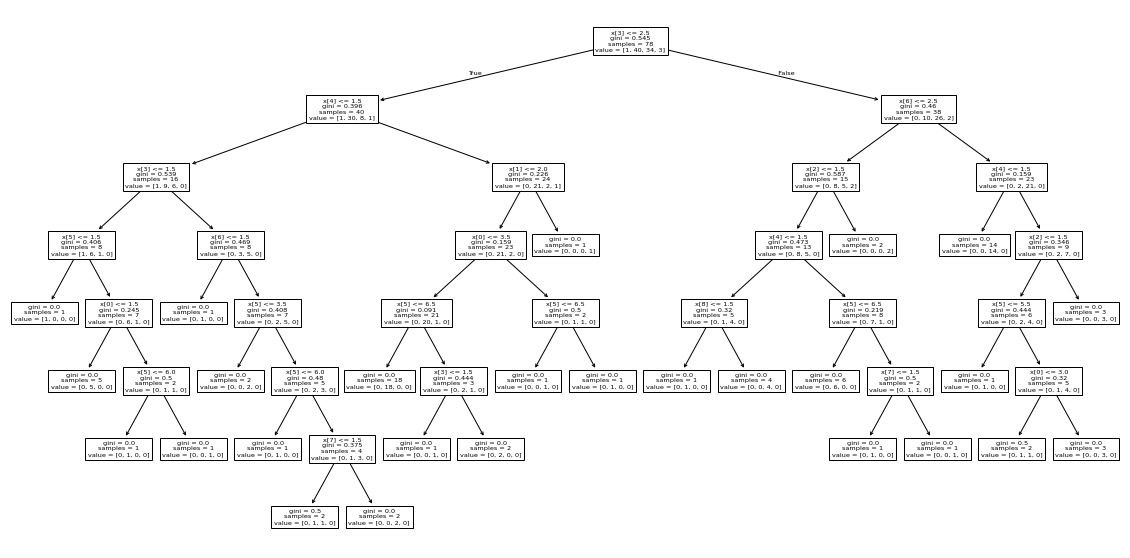

[Text(0.5583333333333333, 0.9375, 'x[3] <= 2.5\ngini = 0.545\nsamples = 78\nvalue = [1, 40, 34, 3]'),
 Text(0.3, 0.8125, 'x[4] <= 1.5\ngini = 0.396\nsamples = 40\nvalue = [1, 30, 8, 1]'),
 Text(0.4291666666666667, 0.875, 'True  '),
 Text(0.13333333333333333, 0.6875, 'x[3] <= 1.5\ngini = 0.539\nsamples = 16\nvalue = [1, 9, 6, 0]'),
 Text(0.06666666666666667, 0.5625, 'x[5] <= 1.5\ngini = 0.406\nsamples = 8\nvalue = [1, 6, 1, 0]'),
 Text(0.03333333333333333, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.1, 0.4375, 'x[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1, 0]'),
 Text(0.06666666666666667, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0]'),
 Text(0.13333333333333333, 0.3125, 'x[5] <= 6.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0]'),
 Text(0.1, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.2, 0.5625, 'x[6] <= 1.5\ngini = 0.469\nsamples = 8\nv

In [27]:
# Limit to the features we selected
lymphdata = lymphdata[feature_cols]

# Split the features and the target column.
X = lymphdata.drop('class', axis=1)
y = lymphdata['class']

# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.47, random_state=78)

# Train the decision tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy    
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
pyplot.figure(figsize=(20, 10))
tree.plot_tree(clf)
